# ***The Amazon Bestselling Books***

This Dataset scrapped from Amazon's website on October 2020. It is about Amazon's Top 50 Bestselling Books 2009-2019 and contains 550 books. Data has been categorized  into fiction and non-fiction using Goodreads. The objective is to do Exploratory Data Analysis and predict a users rating of a book. 

**Features:**

*  **Name:** Name of the book.
*   **Author:** The Author of the book.
*  **User Rating:**  Amazon Users Rating.
*   **Reviews:** Number of Reviews on Amazon.
*   **Price:** The Price of the Book.
*  **Year:** The year(s) it Ranked on the Bestseller.
*   **Genre:** Whether the Book is Fiction or Non-fiction.












In [166]:
# import necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

nltk.download('vader_lexicon')

import warnings
warnings.filterwarnings('ignore')

# read the csv file
df = pd.read_csv( 'bestsellers with categories.csv')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [167]:
# set the color palette
sns.set_palette(sns.color_palette("pastel"))
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('darkgrid')

# ***Data Exploration***

In [168]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [169]:
df.shape

(550, 7)

In [170]:
# check for missing values
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [171]:
# check for duplicate values
df.duplicated().sum()

0

In [172]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


We notice that the minimum price is zero. That would mean that amazon distributed some books for free. We will have to keep an eye on those books because they may generally get higher reviews.

In [173]:
df[df['Price']==0]

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction


In [174]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [175]:
#df['Year'] = pd.to_datetime(df['Year'],format='%Y')

In [176]:
# range of prices
np.sort(df['Price'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        27,  28,  30,  32,  36,  39,  40,  42,  46,  52,  53,  54,  82,
       105])

# ***Data Visualization***

What is the Ratings Distribution for the books?

Text(0, 0.5, 'Frequency')

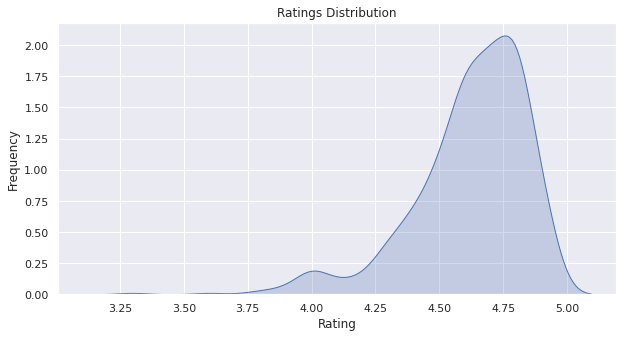

In [177]:
sns.kdeplot(df['User Rating'], shade = True)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

Which category has a wider range and distribution?

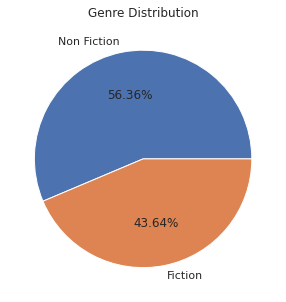

In [178]:
plt.pie(df['Genre'].value_counts(),autopct='%1.2f%%',labels=df['Genre'].value_counts().index);
plt.title('Genre Distribution');

What is the price distribution per genre?

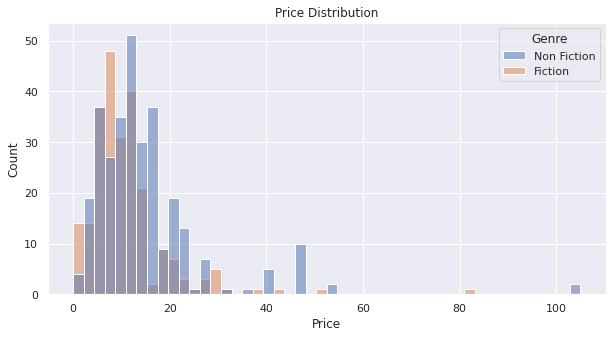

In [179]:
sns.histplot(x='Price',hue='Genre',data=df);
plt.title('Price Distribution');

What is the review distribution per genre?

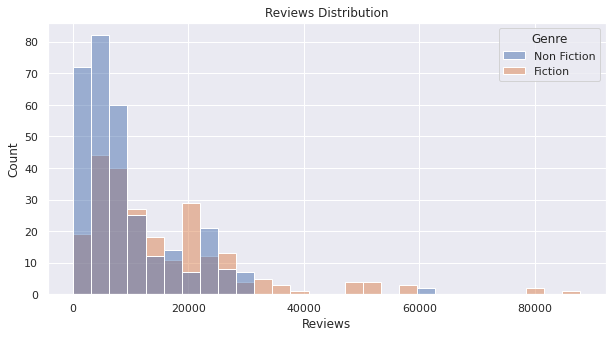

In [180]:
plt.title('Reviews Distribution')
sns.histplot(x= 'Reviews', hue= 'Genre', data=df);

we notice that the vast majority of Books have less than 10.000 reviews.

Who has written the most books?

In [181]:
most_books = df['Author'].value_counts().head(10)
print(most_books)

Jeff Kinney                           12
Suzanne Collins                       11
Gary Chapman                          11
Rick Riordan                          11
American Psychological Association    10
Gallup                                 9
Dr. Seuss                              9
Rob Elliott                            8
Stephenie Meyer                        7
Dav Pilkey                             7
Name: Author, dtype: int64


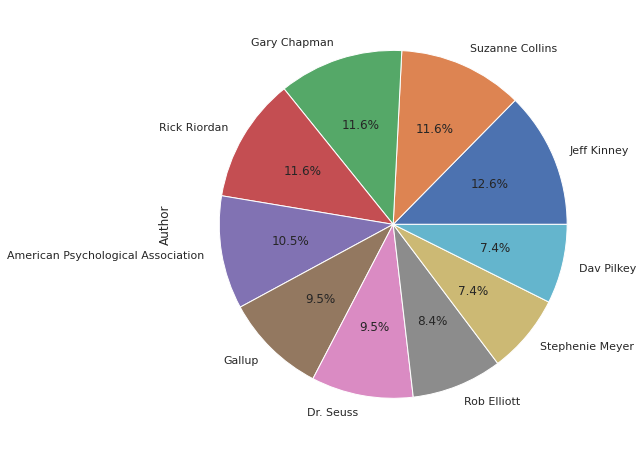

In [182]:
most_books.plot(kind = 'pie', autopct ='%1.1f%%', figsize = (8,8));

What is the number of books per rating?

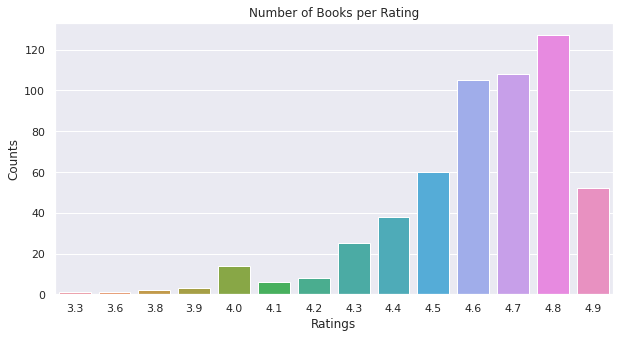

In [183]:
sns.barplot(df['User Rating'].value_counts().index, df['User Rating'].value_counts());
plt.title('Number of Books per Rating');
plt.xlabel('Ratings');
plt.ylabel('Counts');


Which year has the highest number of User Rating?

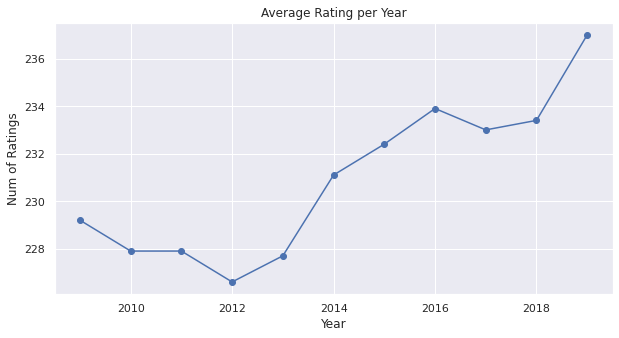

In [184]:
df.groupby('Year')['User Rating'].sum().plot(marker = 'o', c = 'b');
plt.title('Average Rating per Year')
plt.xlabel('Year')
plt.ylabel('Num of Ratings');


Which year has the highest number of Reviews?

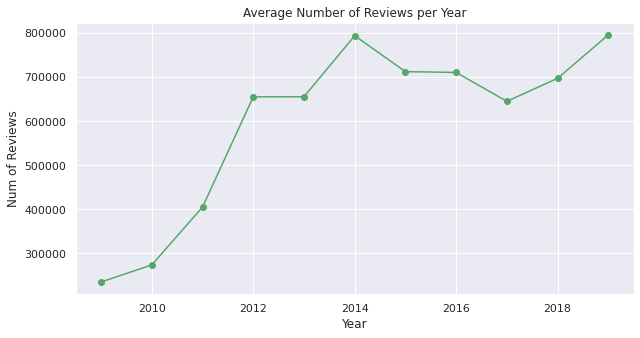

In [185]:
df.groupby('Year')['Reviews'].sum().plot( marker = 'o', c = 'g');
plt.title('Average Number of Reviews per Year');
plt.xlabel('Year');
plt.ylabel('Num of Reviews');

What is the price variation through time?

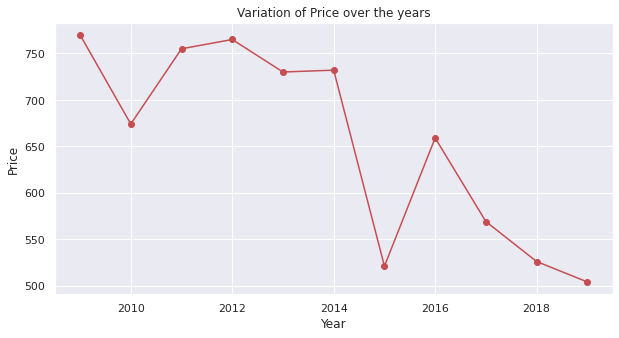

In [186]:
df.groupby('Year')['Price'].sum().plot(marker = 'o', c = 'r')
plt.title('Variation of Price over the years')
plt.xlabel('Year')
plt.ylabel('Price');

What are the highest Reviewed Books?

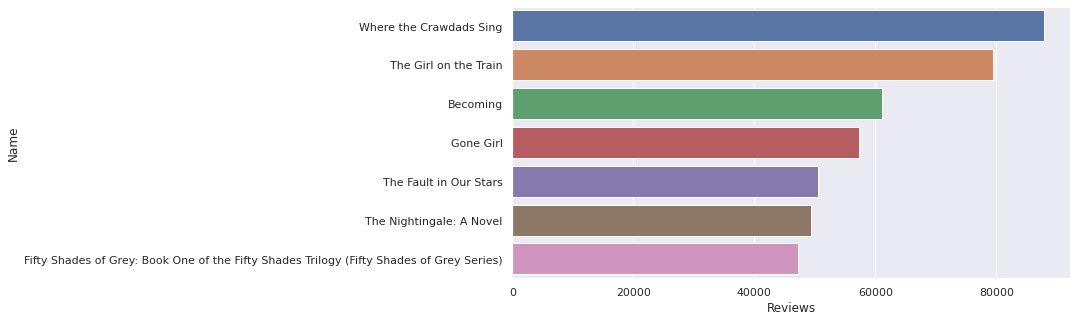

In [187]:
top_reviews = df.nlargest(15, ['Reviews'])
sns.barplot(top_reviews['Reviews'], top_reviews['Name']);

Who are the most popular Authors?

In [188]:
pop_authors = df.groupby('Author').agg({'User Rating': 'mean' , 'Reviews': 'sum', 'Name':'count'}).rename({'Name':'Total Books'}, axis = 1)
pop_authors.sort_values(['User Rating', 'Reviews'], ascending= (False,False)).head(7)


,User Rating,Reviews,Total Books
Author,,,
Emily Winfield Martin,4.9,35368,4
Bill Martin Jr.,4.9,28688,2
Sherri Duskey Rinker,4.9,14076,2
Jill Twiss,4.9,11881,1
Rush Limbaugh,4.9,10986,2
Nathan W. Pyle,4.9,9382,1
Chip Gaines,4.9,7861,1


# ***Data Preproccessing***

In [189]:
# encode categorical attributes
leb = preprocessing.LabelEncoder()    
df['Genre'] = leb.fit_transform(df['Genre']) # Fiction = 0 , Non-fiction = 1
df['Author'] = leb.fit_transform(df['Author'])

data = df.drop('Name',axis=1)
#sentiment analysis for Name column, we try to decode the content of the book dased on the title
df['Name'] = df['Name'].apply(lambda x: x.lower())
df['Name'] = df['Name'].str.replace('[^\w\s]', '')

#calculate negative, positive, neutral and compound values
score = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Name'].apply( lambda x: score.polarity_scores(x))
df['Neutral'] = df['Sentiment'].apply(lambda x: x['neu'])
df['Positive'] = df['Sentiment'].apply(lambda x: x['pos'])
df['Negative'] = df['Sentiment'].apply(lambda x : x['neg'])
df['Compound'] = df['Sentiment'].apply(lambda x: x['compound'])
                                    
                                       
                                       

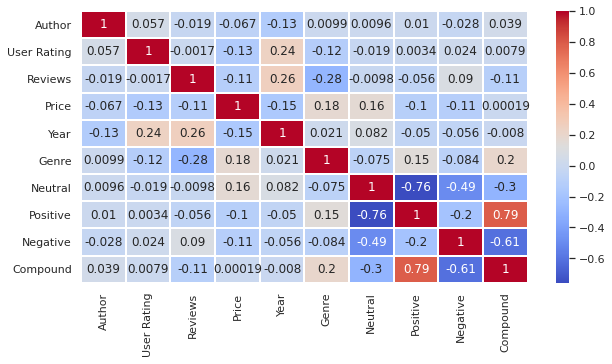

In [190]:
# we check the correlation between the features
sns.heatmap(df.corr(), annot = True , linewidths = 1 ,linecolor = 'white',cmap='coolwarm')
plt.show()

# ***Modeling***

In [191]:
x = data.drop('User Rating', axis = 1)
y = df['User Rating']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20 , random_state = 42)


In [192]:
#scaling our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

***Linear Regression Model***

In [193]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
prediction = lr_model.predict(X_test)
lr_rmse = np.sqrt(metrics.mean_squared_error(y_test,prediction))
print('Root Mean Square Error associated with Linear Regression model is : {}'.format(lr_rmse))


Root Mean Square Error associated with Linear Regression model is : 0.23114461144633605


***Random Forest (Regressor) Model***

In [204]:
model = RandomForestRegressor(n_estimators=450, random_state=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
rf_rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Square Error associated with Random Forest Regressor is : {}'.format(rf_rmse))


Root Mean Square Error associated with Random Forest Regressor is : 0.2229625526579892


***Gradient Boosting Model***

In [195]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train,y_train)
predictions = gb_model.predict(X_test)
gb_rmse = np.sqrt(metrics.mean_squared_error(y_test,predictions))
print('Root Mean Square Error associated with Gradient Boosting Regressor is : {}'.format(gb_rmse))

Root Mean Square Error associated with Gradient Boosting Regressor is : 0.22760389127687322


RMSE (Root Mean Square Error) is the standard deviation of the residuals. Residuals are a measure of how far from the predicted regression line data points are. So RMSE tells us how concetrated the data is around the line of best fit.
We can see that Random Forest model has the lowest RMSE value that means  it predicts  the reviews better.